### Project Description
This project involves the development of a web application for predicting energy consumption using time series forecasting models, specifically the Prophet model. The application allows users to select a state, specify a date range for historical data, and choose a forecast horizon. It then provides predictions of future energy consumption and visualizes the results.

### Inputs and Outputs
**Inputs:**
1. **State Selection:** A dropdown menu to select a specific state.
2. **Date Range:** Date pickers to specify the start and end dates for historical data.
3. **Forecast Horizon:** A slider to choose the number of months into the future for the prediction.

**Outputs:**
1. **Predictions Chart:** A line chart displaying historical energy consumption data and the predicted values.
2. **Mean Absolute Error (MAE):** A metric indicating the accuracy of the predictions.

### Expected Advancements in Society
This project aims to improve energy management and planning by providing accurate predictions of future energy consumption. It can help utility companies optimize energy distribution, reduce costs, and enhance grid reliability. Additionally, it can aid policymakers in making informed decisions regarding energy policies and sustainability initiatives.

### Model Choice
The Prophet model was chosen for this task due to its robustness in handling time series data with strong seasonal effects and its ability to incorporate holiday effects and missing data. Prophet is also user-friendly and provides interpretable results, making it suitable for stakeholders who may not be data science experts.

### Dataset Description
The dataset comprises energy consumption data across various Indian states, recorded on a daily basis. The columns include:

- **DateTime:** The date and time of the observation.
- **States:** Columns representing daily energy consumption values for each state (e.g., Punjab, Haryana, Rajasthan, Delhi, UP, etc.).

Example Data:

| DateTime   | Punjab | Haryana | Rajasthan | Delhi | UP   | Uttarakhand | HP   | J&K  | Chandigarh | ... | West Bengal | Sikkim | Arunachal Pradesh | Assam | Manipur | Meghalaya | Mizoram | Nagaland | Tripura | Date       |
|------------|--------|---------|-----------|-------|------|-------------|------|------|------------|-----|-------------|--------|-------------------|-------|---------|-----------|---------|----------|---------|------------|
| 2019-01-02 | 119.9  | 130.3   | 234.1     | 85.8  | 313.9| 40.7        | 30.0 | 52.5 | 5.0        | ... | 108.2       | 2.0    | 2.1               | 21.7  | 2.7     | 6.1       | 1.9     | 2.2      | 3.4     | 2019-01-02 |
| 2019-01-03 | 121.9  | 133.5   | 240.2     | 85.5  | 311.8| 39.3        | 30.1 | 54.1 | 4.9        | ... | 110.2       | 1.9    | 2.2               | 23.4  | 2.4     | 6.5       | 1.8     | 2.2      | 3.6     | 2019-01-03 |
| 2019-01-04 | 118.8  | 128.2   | 239.8     | 83.5  | 320.7| 38.1        | 30.1 | 53.2 | 4.8        | ... | 106.8       | 1.7    | 2.2               | 21.7  | 2.4     | 6.3       | 1.7     | 2.2      | 3.5     | 2019-01-04 |
| 2019-01-05 | 121.0  | 127.5   | 239.1     | 79.2  | 299.0| 39.2        | 30.2 | 51.5 | 4.3        | ... | 107.0       | 2.0    | 2.2               | 22.5  | 2.7     | 5.7       | 1.8     | 2.3      | 3.5     | 2019-01-05 |
| 2019-01-06 | 121.4  | 132.6   | 240.4     | 76.6  | 286.8| ...         | ...  | ...  | ...        | ... | ...         | ...    | ...               | ...   | ...     | ...       | ...     | ...      | ...     | ...        |



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("dataset_tk.csv")
df.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [ ]:
df.columns

Index(['Unnamed: 0', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP',
       'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype='object')

In [ ]:
df = df.rename(columns={'Unnamed: 0': 'DateTime'})
df['DateTime'] = pd.to_datetime(df['DateTime'],format="%d/%m/%Y %H:%M:%S")
df['Date'] = pd.to_datetime(df['DateTime']).dt.date
df.tail()

,DateTime,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Date
498,2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4,2020-12-01
499,2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3,2020-12-02
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6,2020-12-03
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3,2020-12-04
502,2020-12-05,120.4,111.2,201.4,83.6,287.3,35.2,24.3,42.6,3.5,...,110.4,1.2,2.1,20.3,2.5,5.8,1.6,2.1,3.3,2020-12-05


# Cumulative energy consumption for each state over time

In [ ]:
subsetdf = df.copy()
subsetdf = subsetdf.drop('DateTime', axis=1)

subsetdf.set_index('Date', inplace=True)

cumsum_df = subsetdf.cumsum(axis=0)
print(cumsum_df)

             Punjab  Haryana  Rajasthan    Delhi        UP  Uttarakhand  \
Date                                                                      
2019-01-02    119.9    130.3      234.1     85.8     313.9         40.7   
2019-01-03    241.8    263.8      474.3    171.3     625.7         80.0   
2019-01-04    360.6    392.0      714.1    254.8     946.4        118.1   
2019-01-05    481.6    519.5      953.2    334.0    1245.4        157.3   
2019-01-06    603.0    652.1     1193.6    410.6    1532.2        196.5   
...             ...      ...        ...      ...       ...          ...   
2020-12-01  70482.2  69085.2   109044.6  41606.1  156670.3      18038.8   
2020-12-02  70611.6  69212.5   109263.0  41687.4  157001.7      18075.8   
2020-12-03  70743.7  69342.2   109468.6  41773.0  157338.4      18113.6   
2020-12-04  70875.8  69470.6   109675.6  41856.9  157673.0      18151.8   
2020-12-05  70996.2  69581.8   109877.0  41940.5  157960.3      18187.0   

                 HP     

# Transform the cumulative energy consumption data into a daily format

In [ ]:
states = ['Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP',
       'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura']

In [ ]:
count_date = cumsum_df.groupby(cumsum_df.index)[states].sum()

pw_clean = pd.DataFrame(count_date)
pw_clean['Date'] = pd.to_datetime(pw_clean.index)
pw_clean = pw_clean.set_index('Date')

pw_clean.head(20)

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
2019-01-03,241.8,263.8,474.3,171.3,625.7,80.0,60.1,106.6,9.9,157.5,...,138.1,218.4,3.9,4.3,45.1,5.1,12.6,3.7,4.4,7.0
2019-01-04,360.6,392.0,714.1,254.8,946.4,118.1,90.2,159.8,14.7,232.3,...,204.4,325.2,5.6,6.5,66.8,7.5,18.9,5.4,6.6,10.5
2019-01-05,481.6,519.5,953.2,334.0,1245.4,157.3,120.4,211.3,19.0,301.3,...,270.2,432.2,7.6,8.7,89.3,10.2,24.6,7.2,8.9,14.0
2019-01-06,603.0,652.1,1193.6,410.6,1532.2,196.5,151.4,264.5,23.3,369.4,...,333.1,538.6,9.6,10.9,111.0,12.9,30.8,9.1,11.2,17.3
2019-01-07,721.0,784.2,1435.5,481.7,1826.4,236.6,181.5,317.8,27.3,442.5,...,397.1,647.9,11.1,13.1,132.4,15.4,36.9,10.9,13.5,20.6
2019-01-08,828.5,905.6,1672.7,550.7,2115.8,273.6,210.7,369.0,31.1,516.7,...,460.7,750.8,12.7,15.4,153.1,18.0,43.1,12.7,15.6,23.9
2019-01-09,961.0,1053.8,1869.7,639.9,2374.4,309.5,236.0,406.9,35.0,593.9,...,547.3,882.5,13.8,17.5,178.9,20.3,49.1,14.4,18.0,28.1
2019-01-10,1092.5,1210.8,2069.6,732.7,2658.6,344.8,262.5,438.6,38.9,672.9,...,626.1,1022.6,14.9,19.6,204.7,22.7,55.3,16.1,20.1,32.4


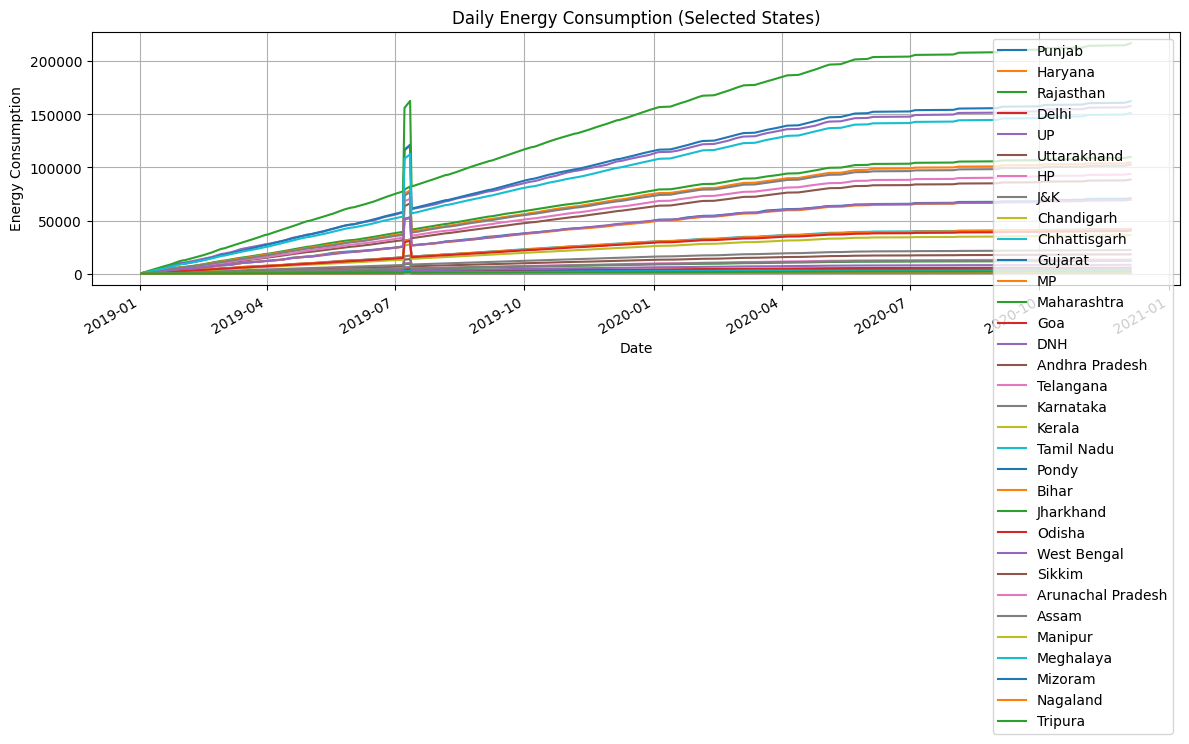

In [ ]:
plt.figure(figsize=(12, 6))

for state in states:
    pw_clean[state].plot(label=state)

plt.title('Daily Energy Consumption (Selected States)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)

# plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Whats that peak just after 2019-07???

# Let's create a new DataFrame df1 that's a deep copy of the original one, along with additional columns for year, quarter, month, day, week of year, hour, minute, weekday name, and full month name, all extracted from the original 'DateTime' column

In [ ]:
df1 = df.copy('Deep')
df1.head()
df1['year'] = df1['DateTime'].apply(lambda x : x.year)
df1['Quarter'] = df1['DateTime'].apply(lambda x : x.quarter)
df1['month'] = df1['DateTime'].apply(lambda x : x.month)
df1['day'] = df1['DateTime'].apply(lambda x : x.day)
df1['weekofyear'] = df1['DateTime'].apply(lambda x : x.weekofyear)
df1['hour'] = df1['DateTime'].apply(lambda x : x.hour)
df1['minute'] = df1['DateTime'].apply(lambda x : x.minute)
df1['weekday'] = df1['DateTime'].apply(lambda x : x.day_name())
df1['MonthName'] = df1['DateTime'].apply(lambda x : x.month_name())
df1.head()

,DateTime,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Date,year,Quarter,month,day,weekofyear,hour,minute,weekday,MonthName
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,2019-01-02,2019,1,1,2,1,0,0,Wednesday,January
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,2019-01-03,2019,1,1,3,1,0,0,Thursday,January
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,2019-01-04,2019,1,1,4,1,0,0,Friday,January
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,2019-01-05,2019,1,1,5,1,0,0,Saturday,January
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,2019-01-06,2019,1,1,6,1,0,0,Sunday,January


# Add a new column named 'timing' to your DataFrame df1, which assigns time periods ("Night", "Morning", etc.) to each hour value

In [ ]:
def hours2timing(x):
    if x in [22,23,0,1,2,3]:
        timing = 'Night'
    elif x in range(4, 12):
        timing = 'Morning'
    elif x in range(12, 17):
        timing = 'Afternoon'
    elif x in range(17, 22):
        timing = 'Evening'
    else:
        timing = 'X'
    return timing

df1['timing'] = df1['hour'].apply(hours2timing)
df1.head(3)

,DateTime,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,year,Quarter,month,day,weekofyear,hour,minute,weekday,MonthName,timing
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,2019,1,1,2,1,0,0,Wednesday,January,Night
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,2019,1,1,3,1,0,0,Thursday,January,Night
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,2019,1,1,4,1,0,0,Friday,January,Night


# Separate data by quarter for comparisons

<ipython-input-50-30fa97f56633>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Q1["Delhi"],color="skyblue", ax=axes[0,0]).set_title("Q1 - Consumption")
<ipython-input-50-30fa97f56633>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Q2["Delhi"],color="red", ax=axes[0,1]).set_title("Q2 - Consu

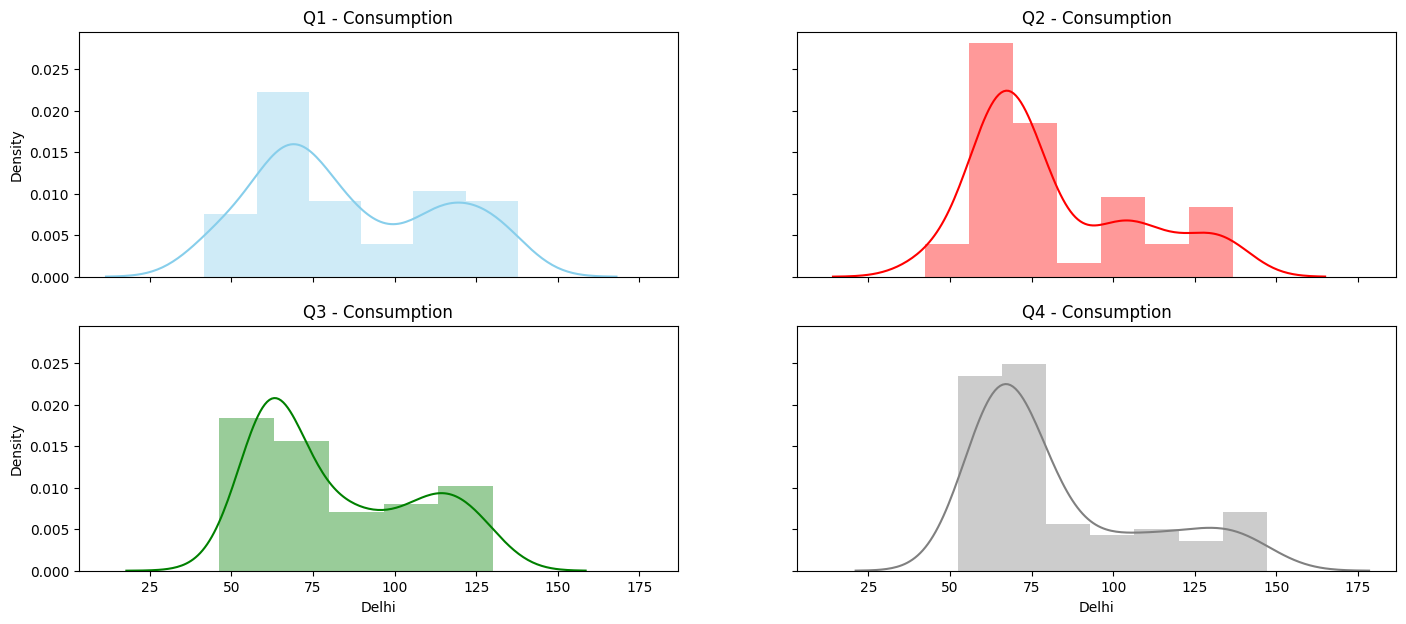

In [ ]:
Q1 = df1[df1["Quarter"]==1]
Q2 = df1[df1["Quarter"]==2]
Q3 = df1[df1["Quarter"]==3]
Q4 = df1[df1["Quarter"]==4]

#Plot
fig,axes = plt.subplots(2,2,figsize=(17,7),sharex=True,sharey=True)

sns.distplot(Q1["Delhi"],color="skyblue", ax=axes[0,0]).set_title("Q1 - Consumption")
sns.distplot(Q2["Delhi"],color="red", ax=axes[0,1]).set_title("Q2 - Consumption")
sns.distplot(Q3["Delhi"],color="green", ax=axes[1,0]).set_title("Q3 - Consumption")
sns.distplot(Q4["Delhi"],color="gray", ax=axes[1,1]).set_title("Q4 - Consumption")

del Q1, Q2, Q3, Q4

# Time series plot of Delhi's energy consumption

## Only for 'Delhi' 'DateTime'

In [ ]:
delhi = pd.DataFrame(data=df1,columns=['Delhi','DateTime'])
delhi.head()

,Delhi,DateTime
0,85.8,2019-01-02
1,85.5,2019-01-03
2,83.5,2019-01-04
3,79.2,2019-01-05
4,76.6,2019-01-06


Set the 'DateTime' column as the index of the delhi df

In [ ]:
delhi.set_index('DateTime',inplace=True)
delhi.head()

,Delhi
DateTime,
2019-01-02,85.8
2019-01-03,85.5
2019-01-04,83.5
2019-01-05,79.2
2019-01-06,76.6


# Time series power consumption of delhi

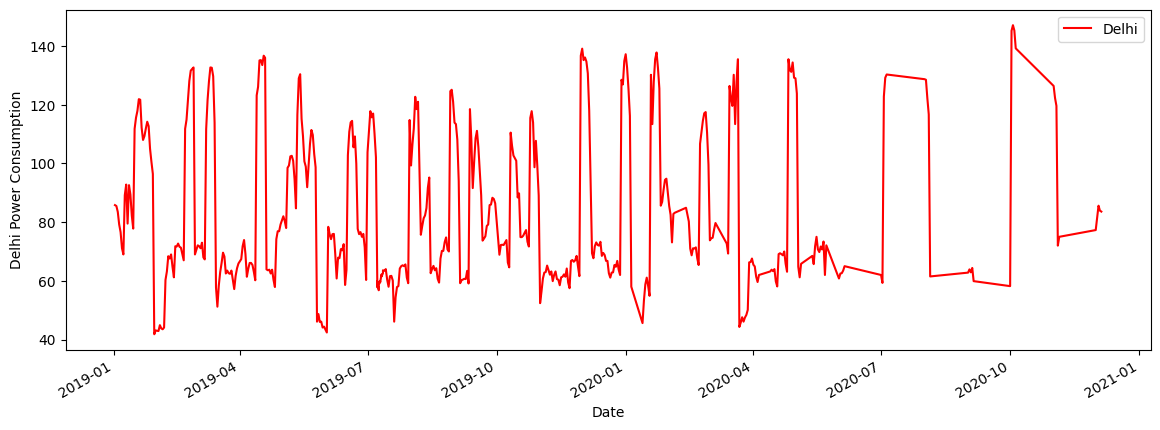

In [ ]:
delhi.plot(figsize=(14,5),color='Red')
plt.xlabel('Date')
plt.ylabel('Delhi Power Consumption')
plt.show()

# Now we can predict for delhi using this delhi dataframe

In [ ]:
delhi.head()

,Delhi
DateTime,
2019-01-02,85.8
2019-01-03,85.5
2019-01-04,83.5
2019-01-05,79.2
2019-01-06,76.6


# Things to focus on

columns more dependent on time

columns that simple regression can work upon

Columns that can utilize neural networks

# Time-series analysis with prophet

In [ ]:
df1.columns

Index(['DateTime', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP',
       'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura', 'Date',
       'year', 'Quarter', 'month', 'day', 'weekofyear', 'hour', 'minute',
       'weekday', 'MonthName', 'timing'],
      dtype='object')

In [ ]:
prophet_df = pd.DataFrame(data=df1,columns=['Delhi','DateTime'])

prophet_df.rename(columns={"DateTime" : "ds", "Delhi" : "y"},inplace=True)
prophet_df.head()

,y,ds
0,85.8,2019-01-02
1,85.5,2019-01-03
2,83.5,2019-01-04
3,79.2,2019-01-05
4,76.6,2019-01-06


In [ ]:
from prophet import Prophet

model = Prophet(seasonality_mode='multiplicative',yearly_seasonality=4)
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


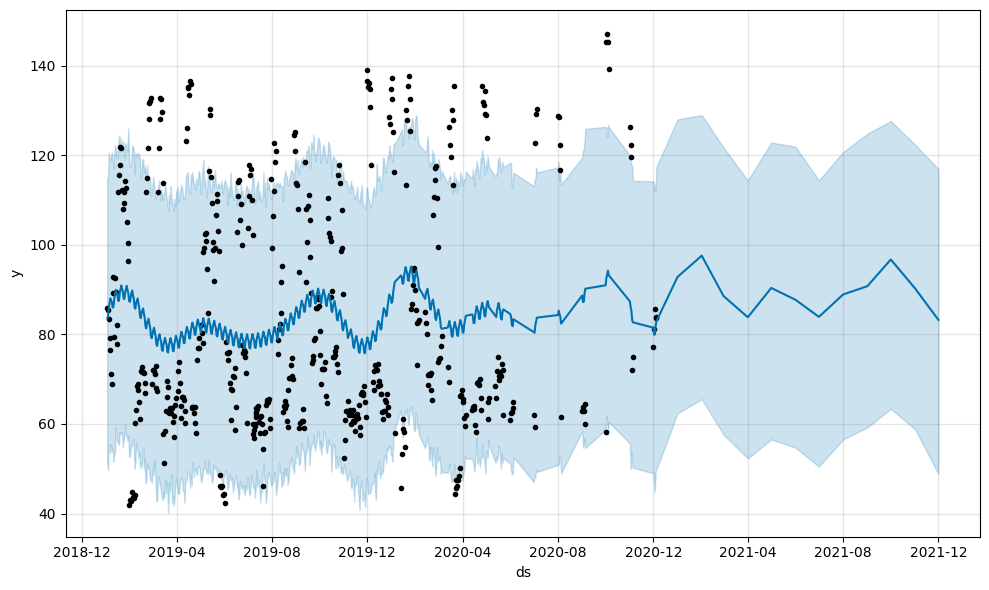

In [ ]:
future = model.make_future_dataframe(periods=12 * 1, freq='MS')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

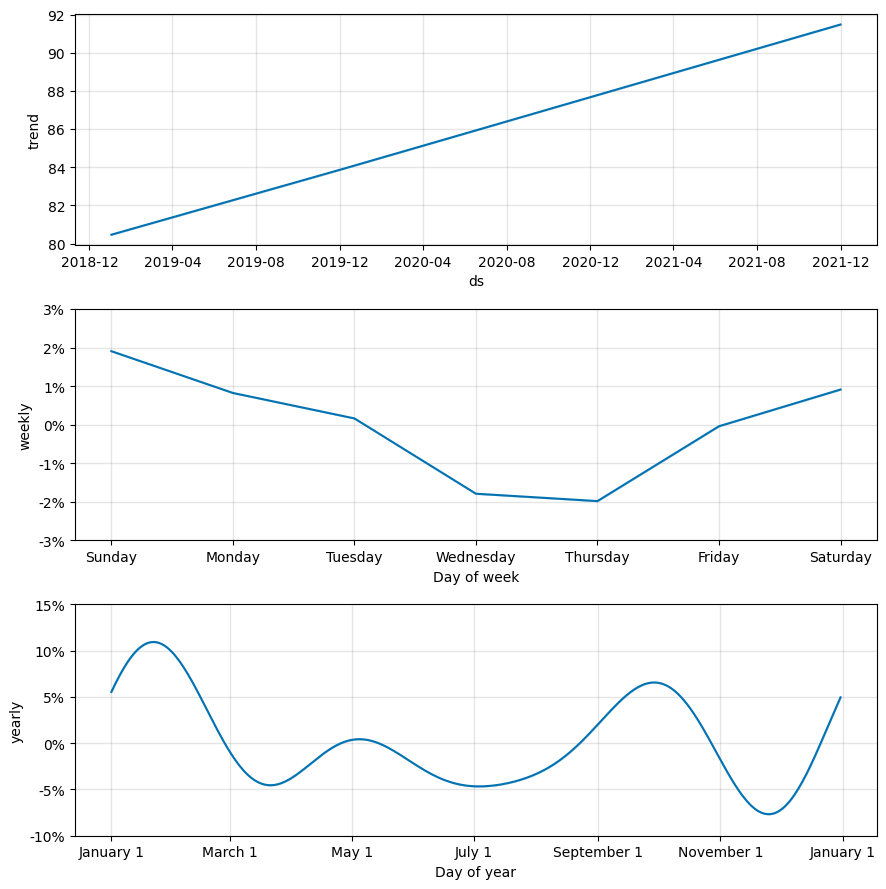

In [ ]:
model.plot_components(forecast)
plt.show()

In [ ]:
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4, weekly_seasonality=True, daily_seasonality=True)
model.fit(prophet_df)

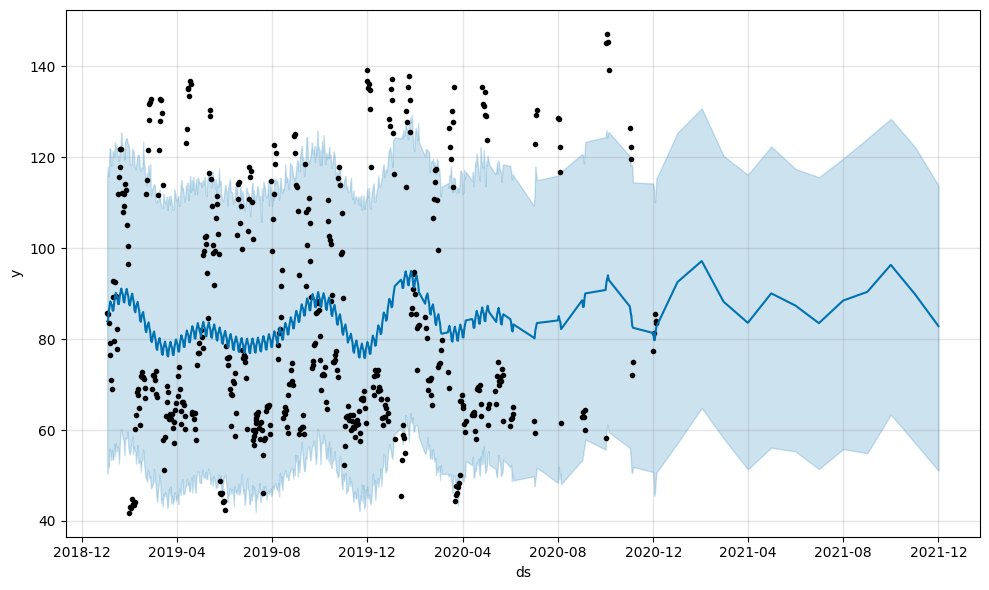

In [ ]:
future = model.make_future_dataframe(periods=12 * 1, freq='MS')
forecast = model.predict(future)

fig = model.plot(forecast)
plt.show()

## Black dots: Observed values of our time series
## Blue line: Forecasted values
## Blue shaded regions: Uncertainty intervals of our forecasts

### Our model seems to be going crazy with the data
Need more research

First up our time series values seem too scattered and the model not being able to fit according to it.

The uncertainity region seems way too large too

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-01-02,83.311262,50.479107,115.783413,83.311262,83.311262,-0.03119,-0.03119,-0.03119,0.007109,...,-0.017344,-0.017344,-0.017344,0.055642,0.055642,0.055642,0.0,0.0,0.0,83.903494
1,2019-01-03,83.320958,52.414901,117.968068,83.320958,83.320958,-0.03119,-0.03119,-0.03119,0.009557,...,-0.019192,-0.019192,-0.019192,0.059939,0.059939,0.059939,0.0,0.0,0.0,84.117227
2,2019-01-04,83.330654,51.799077,115.879176,83.330654,83.330654,-0.03119,-0.03119,-0.03119,0.032644,...,-0.000268,-0.000268,-0.000268,0.064102,0.064102,0.064102,0.0,0.0,0.0,86.050887
3,2019-01-05,83.340351,55.960764,121.999627,83.340351,83.340351,-0.03119,-0.03119,-0.03119,0.045762,...,0.008833,0.008833,0.008833,0.068119,0.068119,0.068119,0.0,0.0,0.0,87.154169
4,2019-01-06,83.350047,55.147460,121.786976,83.350047,83.350047,-0.03119,-0.03119,-0.03119,0.059223,...,0.018436,0.018436,0.018436,0.071977,0.071977,0.071977,0.0,0.0,0.0,88.286258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2021-08-01,92.693951,55.806816,119.674515,92.681955,92.705978,-0.03119,-0.03119,-0.03119,-0.045583,...,0.018436,0.018436,0.018436,-0.032829,-0.032829,-0.032829,0.0,0.0,0.0,88.468647
506,2021-09-01,93.008118,54.901252,124.053009,92.993711,93.022360,-0.03119,-0.03119,-0.03119,-0.028212,...,-0.017344,-0.017344,-0.017344,0.020322,0.020322,0.020322,0.0,0.0,0.0,90.384183
507,2021-10-01,93.312152,63.414154,128.432301,93.295684,93.329298,-0.03119,-0.03119,-0.03119,0.032220,...,-0.000268,-0.000268,-0.000268,0.063678,0.063678,0.063678,0.0,0.0,0.0,96.318661
508,2021-11-01,93.626320,57.162092,122.234720,93.607572,93.646057,-0.03119,-0.03119,-0.03119,-0.040180,...,0.007935,0.007935,0.007935,-0.016925,-0.016925,-0.016925,0.0,0.0,0.0,89.864415


In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'daily', 'daily_lower', 'daily_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'weekly',
       'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
from sklearn.metrics import mean_absolute_error

# forecast = forecast[['ds', 'yhat']].merge(df, on='ds', how='left')

# mean_absolute_error(forecast['y'].dropna(), forecast['yhat'][:len(forecast['y'].dropna())])

In [ ]:
# fig2 = model.plot_components(forecast)
# plt.show()

In [ ]:
# to suppress a ton of info logs generated by prophet

import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

# Let's try applying prophet for all the states

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_prophet_model(state_data, state_name):
    df = state_data[['DateTime', state_name]].rename(columns={"DateTime": "ds", state_name: "y"})

    model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4, daily_seasonality=True)
    model.fit(df)

    future = model.make_future_dataframe(periods=12 * 1, freq='MS')

    forecast = model.predict(future)

    forecast = forecast[['ds', 'yhat']].merge(df, on='ds', how='left')

    mae = mean_absolute_error(forecast['y'].dropna(), forecast['yhat'][:len(forecast['y'].dropna())])

    return mae


metrics = {'State': [], 'MAE': []}

for state in states:
    mae = evaluate_prophet_model(df1, state)
    metrics['State'].append(state)
    metrics['MAE'].append(mae)

metrics

{'State': ['Punjab',
  'Haryana',
  'Rajasthan',
  'Delhi',
  'UP',
  'Uttarakhand',
  'HP',
  'J&K',
  'Chandigarh',
  'Chhattisgarh',
  'Gujarat',
  'MP',
  'Maharashtra',
  'Goa',
  'DNH',
  'Andhra Pradesh',
  'Telangana',
  'Karnataka',
  'Kerala',
  'Tamil Nadu',
  'Pondy',
  'Bihar',
  'Jharkhand',
  'Odisha',
  'West Bengal',
  'Sikkim',
  'Arunachal Pradesh',
  'Assam',
  'Manipur',
  'Meghalaya',
  'Mizoram',
  'Nagaland',
  'Tripura'],
 'MAE': [45.06286770155139,
  30.129096007349116,
  19.99007189835376,
  21.586821010479245,
  55.68150311439955,
  4.911636650847369,
  3.4020684474222684,
  3.622215546510963,
  0.9402571497910927,
  8.185006288546758,
  27.609218752476426,
  25.695690410134553,
  33.47587288076002,
  1.159542112130278,
  2.9324499378069446,
  13.094713938176172,
  23.91275781213066,
  25.46381557921761,
  5.329227735614136,
  27.75137002670164,
  0.8388352157156568,
  12.319888695682126,
  1.4462105482309553,
  8.889486398726435,
  23.775664635189273,
  0.2

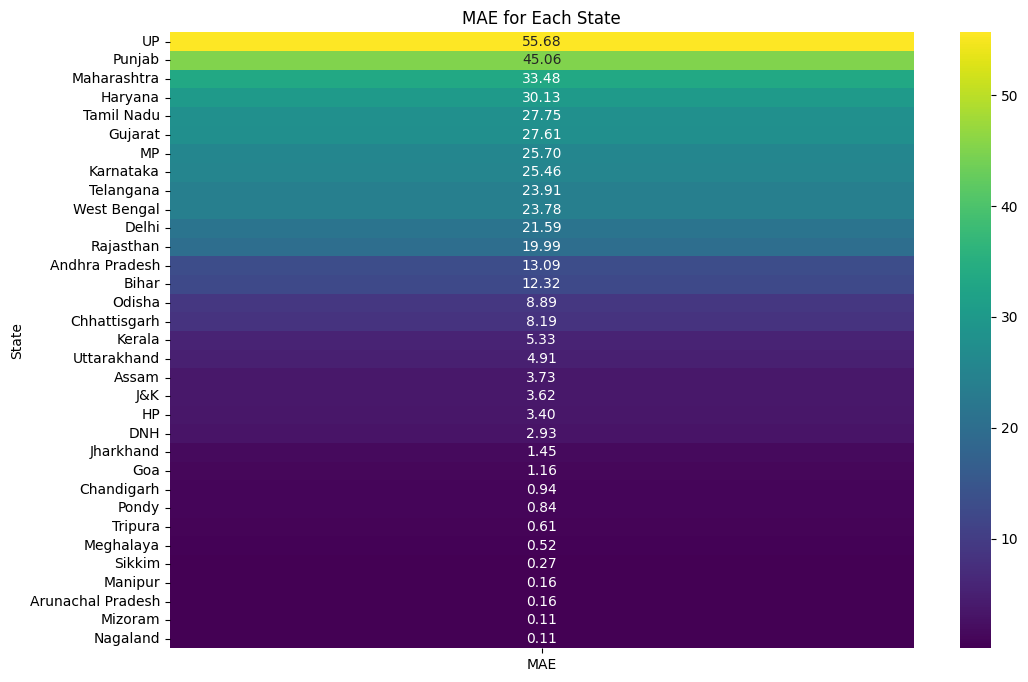

In [ ]:
metrics_df = pd.DataFrame(metrics)

metrics_df.set_index('State', inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df[['MAE']].sort_values(by=['MAE'], ascending=False), annot=True, cmap='viridis', fmt='.2f')
plt.title('MAE for Each State')
plt.show()

### So with the current model UP and Punjab seem to have the worst errors

Let's try changing some seasonalities

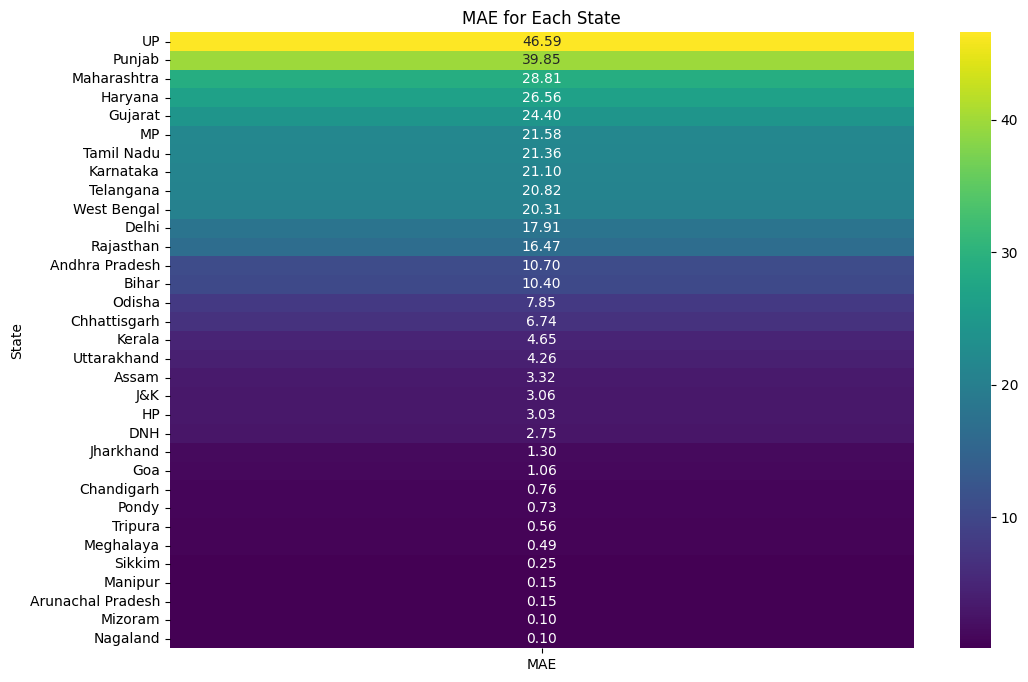

In [ ]:
statewise_prophet_models = {}

def evaluate_prophet_model(state_data, state_name):
    df = state_data[['DateTime', state_name]].rename(columns={"DateTime": "ds", state_name: "y"})

    model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, daily_seasonality=True)
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5) # fourier_order higher captures more complex relationships in the data
    model.fit(df)

    future = model.make_future_dataframe(periods=12 * 1, freq='MS')

    forecast = model.predict(future)

    forecast = forecast[['ds', 'yhat']].merge(df, on='ds', how='left')

    statewise_prophet_models[state_name] = model

    mae = mean_absolute_error(forecast['y'].dropna(), forecast['yhat'][:len(forecast['y'].dropna())])

    return mae


metrics = {'State': [], 'MAE': []}

for state in states:
    mae = evaluate_prophet_model(df1, state)
    metrics['State'].append(state)
    metrics['MAE'].append(mae)

metrics_df = pd.DataFrame(metrics)

metrics_df.set_index('State', inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df[['MAE']].sort_values(by=['MAE'], ascending=False), annot=True, cmap='viridis', fmt='.2f')
plt.title('MAE for Each State')
plt.show()

### Adding monthly sesonality did bring down the errors a notch

Need more research into why the errors are occuring for these few states

Maybe more outliers

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


# How the UI will be

Input: dropdown for states

Input: For year range

Input: For how many months do we want the prediction

Output: Predictions chart of prophet model

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

min_date = df1['DateTime'].min()
max_date = df1['DateTime'].max()

state_dropdown = widgets.Dropdown(
    options=states,
    description='State:',
    disabled=False,
)

date_picker_start = widgets.DatePicker(
    description=f'Start Date ({min_date.date()} - {max_date.date()})',
    disabled=False,
    value=min_date.date()
)

date_picker_end = widgets.DatePicker(
    description=f'End Date ({min_date.date()} - {max_date.date()})',
    disabled=False,
    value=max_date.date()
)

forecast_horizon_slider = widgets.IntSlider(
    value=12,
    min=1,
    max=100,
    step=1,
    description='Months:',
    disabled=False,
)

predict_button = widgets.Button(
    description='Predict',
    disabled=False,
    button_style='',
    tooltip='Click to predict',
    icon='check'
)

output = widgets.Output()


def on_predict_button_clicked(b):
    with output:
        clear_output()
        state = state_dropdown.value
        start_date = pd.to_datetime(date_picker_start.value)
        end_date = pd.to_datetime(date_picker_end.value)
        forecast_horizon = forecast_horizon_slider.value

        state_data = df1[['DateTime', state]].copy()
        state_data['DateTime'] = pd.to_datetime(state_data['DateTime'])
        state_data = state_data[(state_data['DateTime'] >= start_date) & (state_data['DateTime'] <= end_date)]

        if state_data.empty:
            print("No data available for the selected date range. Please select a range within the available data.")
            return

        mae = evaluate_prophet_model(state_data, state)
        model = statewise_prophet_models[state]
        future = model.make_future_dataframe(periods=forecast_horizon, freq='MS')
        forecast = model.predict(future)

        plt.figure(figsize=(12, 8))
        plt.plot(state_data['DateTime'], state_data[state], label='Actual')
        plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
        plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
        plt.xlabel('Date')
        plt.ylabel('Energy Consumption')
        plt.title(f'Energy Consumption Prediction for {state}')
        plt.legend()
        plt.show()

        print(f'Mean Absolute Error (MAE): {mae:.2f}')

predict_button.on_click(on_predict_button_clicked)

display(widgets.VBox([state_dropdown, date_picker_start, date_picker_end, forecast_horizon_slider, predict_button, output]))
